# Lost Function

## 1. Mean Squared Error

$$
E = \frac{1}{2}\sum_k(y_k - t_k)^2
\tag{4.1}
$$

$y_k$: output  
$t_k$: training value  
$k$: dimensions

### e.g.

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [1]:
import numpy as np

def mean_squared_error(y, t):
  return 0.5 * np.sum((y - t) ** 2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003


## 2. Cross Entropy Error

$$
E = -\sum_kt_k\log y_k
\tag{4.2}
$$

### e.g.

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
import numpy as np
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338


## Sum of Cross Entropy Error

$$
E = -\frac{1}{N}\sum_n\sum_kt_{nk}\log{y_{nk}}
\tag{4.3}
$$

## mini-batch Learning

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


随机抽取10组数据

In [11]:
import numpy as np
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)

[48869 59785 11343 13963  4100 32335 41823  6414 59352 55044]


当 one hot 启用时:

In [22]:
import numpy as np
def cross_entropy_error_onehot(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
    print("y.shape:", y.shape)
    
  batch_size = y.shape[0]
  print("batch size:", batch_size)
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

print(cross_entropy_error_onehot(np.array([[0.1, 0.2, 0.7], [0.3, 0.2, 0.5]]), np.array([[0, 0, 1], [0, 0, 1]])))



batch size: 2
0.5249108908207827


当 标签 启用时(one hot 未启用):

In [53]:
import numpy as np
def cross_entropy_error_tag(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    print("batch size:", batch_size)
    print(np.arange(batch_size))
    print(type(np.arange(batch_size)))
    print(y[np.arange(batch_size), t])
    print(y[1])
    print(y[np.array([0, 1]), t])
    print(type(np.arange(2)))
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

y = np.array([[0.1, 0.2, 0.7], [0.3, 0.2, 0.5]])
t = np.array([2, 2])
print(cross_entropy_error_tag(y, t))

batch size: 2
[0 1]
<class 'numpy.ndarray'>
[0.7 0.5]
[0.3 0.2 0.5]
[0.7 0.5]
<class 'numpy.ndarray'>
0.5249108908207827


In [54]:
print(np.__version__)

a = np.array([[1, 2], [3, 4]])
print(a.flatten())
print(a.flatten('F'))
print(a.argmax())
print(np.argmax(a))
print(a[0,1])

1.26.4
[1 2 3 4]
[1 3 2 4]
3
3
2


# 数值微分/梯度

## 导数 Derivative

$$
\frac{\mathrm{d}f(x)}{\mathrm{d}x} = \lim_{h\rightarrow0}\frac{f(x+h)-f(x)}{h}
\tag{4.4}
$$

例:
$$
y = 0.01x^2+0.1x\tag{4.5}
$$

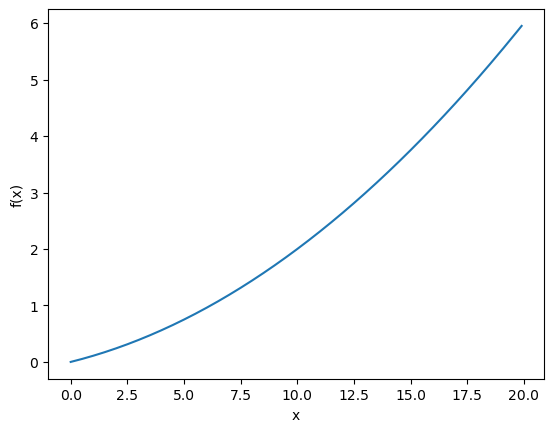

In [58]:
import matplotlib.pyplot as plt

def f(x):
  return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

计算这个函数在 x=5 和 x=10 处的导数

In [59]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

print(numerical_diff(f, 5))
print(numerical_diff(f, 10))

0.1999999999990898
0.2999999999986347


## 偏导数 Partial derivative

例2，给定二元二次函数:
$$
f(x_0, x_1) = x_0^2 +x_1^2
\tag{4.6}
$$
分别求:在 $x_0 = 3, x_1=4$ 处 $x_0$ 和 $x_1$ 的导数

In [62]:
def f22(x):
  return np.sum(x**2)

In [61]:
def f220(x):
  return x**2 + 4**2

def f221(x):
  return 3**2 + x**2

print(numerical_diff(f220, 3))
print(numerical_diff(f221, 4))

6.00000000000378
7.999999999999119


## 梯度 Gradient

由偏导数组成的向量($\frac{\delta f}{\delta x_0},\frac{\delta f}{\delta x_1}$) 称为**梯度**(gradient)

In [72]:
def gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  for idx in range(x.size):
    val_temp = x[idx]
    x[idx] = val_temp + h
    fxh1 = f(x)
    x[idx] = val_temp - h
    fxh2 = f(x)
    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = val_temp
  return grad

x = np.array([3.0, 4.0])
print(gradient(f22, x))
x = np.array([1.0, 2.0])
print(gradient(f22, x))
x = np.array([0.0, 2.0])
print(gradient(f22, x))
x = np.array([3.0, 0.0])
print(gradient(f22, x))
    

[6. 8.]
[2. 4.]
[0. 4.]
[6. 0.]


### 梯度法

$$
\begin{align}
x_0 = x_0 - \eta\frac{\delta f}{\delta x_o}
\\
x_1 = x_1 - \eta\frac{\delta f}{\delta x_o}
\end{align}
\tag{4.7}
$$

$\eta$ 表示更新量，在神经网络的学习中，称为**学习率 learning rate**。

In [82]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = gradient(f, x)
    x -= lr * grad
    
  return x

In [81]:
def f01(x):
  return np.sum(x**2)

init_x = np.array([-3.0, 4.0])
print(gradient_descent(f01, init_x))

0 [-3.  4.]
[-6.  8.]
1 [-2.94  3.92]
[-5.88  7.84]
2 [-2.8812  3.8416]
[-5.7624  7.6832]
3 [-2.823576  3.764768]
[-5.647152  7.529536]
4 [-2.76710448  3.68947264]
[-5.53420896  7.37894528]
5 [-2.71176239  3.61568319]
[-5.42352478  7.23136637]
6 [-2.65752714  3.54336952]
[-5.31505429  7.08673905]
7 [-2.6043766   3.47250213]
[-5.2087532   6.94500427]
8 [-2.55228907  3.40305209]
[-5.10457814  6.80610418]
9 [-2.50124329  3.33499105]
[-5.00248657  6.6699821 ]
10 [-2.45121842  3.26829123]
[-4.90243684  6.53658246]
11 [-2.40219405  3.2029254 ]
[-4.8043881   6.40585081]
12 [-2.35415017  3.13886689]
[-4.70830034  6.27773379]
13 [-2.30706717  3.07608956]
[-4.61413434  6.15217911]
14 [-2.26092582  3.01456777]
[-4.52185165  6.02913553]
15 [-2.21570731  2.95427641]
[-4.43141462  5.90855282]
16 [-2.17139316  2.89519088]
[-4.34278632  5.79038176]
17 [-2.1279653   2.83728706]
[-4.2559306   5.67457413]
18 [-2.08540599  2.78054132]
[-4.17081199  5.56108265]
19 [-2.04369787  2.7249305 ]
[-4.08739575  5.